# Import Dataset and Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
loan_data = pd.read_csv('loan_data.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
for i in loan_data.columns:
    print(i, loan_data[i].nunique())

Loan_ID 614
Gender 2
Married 2
Dependents 4
Education 2
Self_Employed 2
ApplicantIncome 505
CoapplicantIncome 287
LoanAmount 203
Loan_Amount_Term 10
Credit_History 2
Property_Area 3
Loan_Status 2


In [6]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data Exploration

##### for the Gender column, we see how to fill the missing values

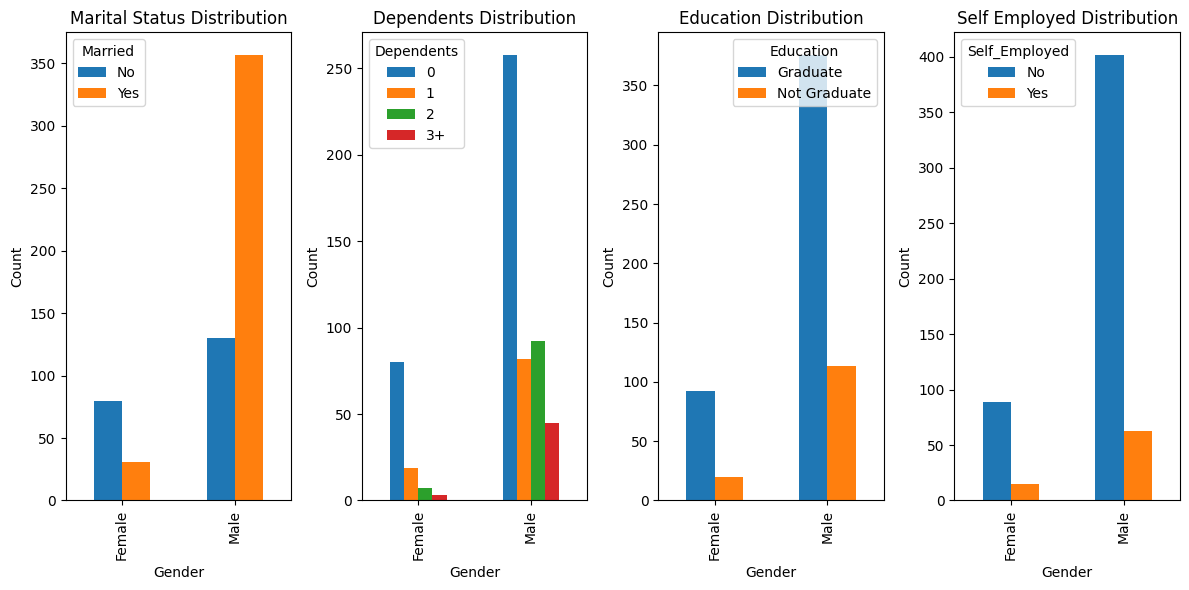

In [7]:
# Assuming you have loaded the dataset into a DataFrame called "loan_data"
grouped_G_M = loan_data.groupby(['Gender', 'Married']).size().unstack()
grouped_G_D = loan_data.groupby(['Gender', 'Dependents']).size().unstack()
grouped_G_E = loan_data.groupby(['Gender', 'Education']).size().unstack()
grouped_G_S = loan_data.groupby(['Gender', 'Self_Employed']).size().unstack()

# Create a figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))

# Plot the first bar plot on the first subplot
grouped_G_M.plot(kind='bar', stacked=False, ax=axes[0])
axes[0].set_title('Marital Status Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Plot the second bar plot on the second subplot
grouped_G_D.plot(kind='bar', stacked=False, ax=axes[1])
axes[1].set_title('Dependents Distribution')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

# Plot the third bar plot on the third subplot
grouped_G_E.plot(kind='bar', stacked=False, ax=axes[2])
axes[2].set_title('Education Distribution')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Count')

# Plot the fourth bar plot on the fourth subplot
grouped_G_S.plot(kind='bar', stacked=False, ax=axes[3])
axes[3].set_title('Self Employed Distribution')
axes[3].set_xlabel('Gender')
axes[3].set_ylabel('Count')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### for the Married column, we see how to fill the missing values

In [8]:
# get the records of null values in married column
married_null = loan_data[loan_data['Married'].isnull()]
married_null

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [9]:
similar_married_null = loan_data[(loan_data['Education']=='Graduate') & (loan_data['Self_Employed']=='No') & (loan_data['Loan_Status']=='Y')]
similar_married_null

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


#### for the Dependents column, we see how to fill the missing values

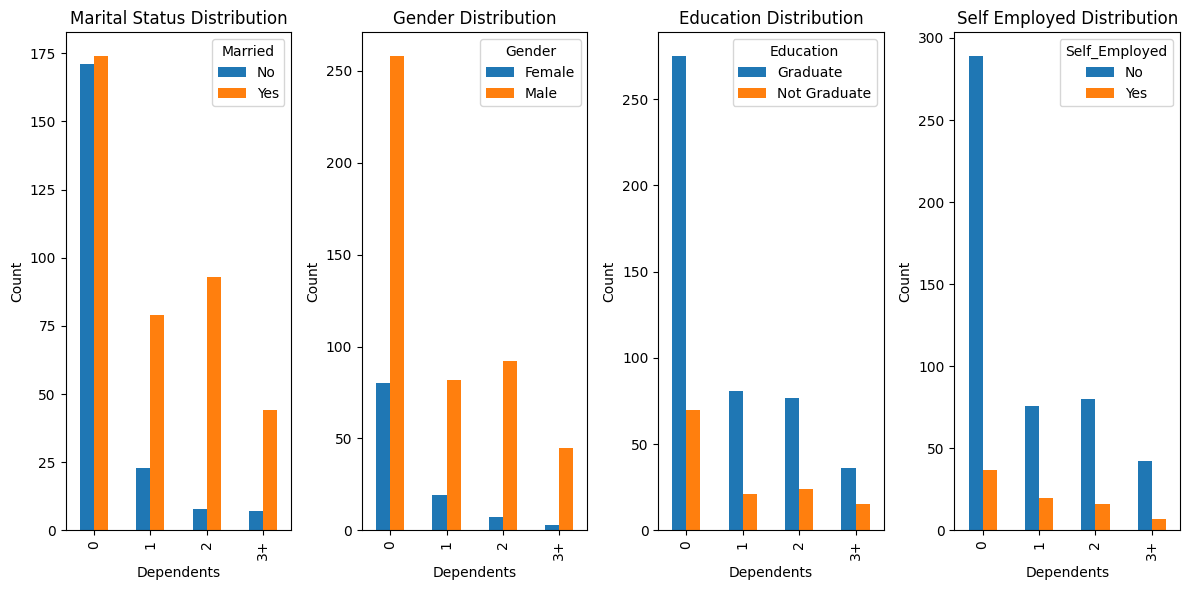

In [10]:
# Assuming you have loaded the dataset into a DataFrame called "loan_data"
grouped_G_M = loan_data.groupby(['Dependents', 'Married']).size().unstack()
grouped_G_D = loan_data.groupby(['Dependents', 'Gender']).size().unstack()
grouped_G_E = loan_data.groupby(['Dependents', 'Education']).size().unstack()
grouped_G_S = loan_data.groupby(['Dependents', 'Self_Employed']).size().unstack()

# Create a figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))

# Plot the first bar plot on the first subplot
grouped_G_M.plot(kind='bar', stacked=False, ax=axes[0])
axes[0].set_title('Marital Status Distribution')
axes[0].set_xlabel('Dependents')
axes[0].set_ylabel('Count')

# Plot the second bar plot on the second subplot
grouped_G_D.plot(kind='bar', stacked=False, ax=axes[1])
axes[1].set_title('Gender Distribution')
axes[1].set_xlabel('Dependents')
axes[1].set_ylabel('Count')

# Plot the third bar plot on the third subplot
grouped_G_E.plot(kind='bar', stacked=False, ax=axes[2])
axes[2].set_title('Education Distribution')
axes[2].set_xlabel('Dependents')
axes[2].set_ylabel('Count')

# Plot the fourth bar plot on the fourth subplot
grouped_G_S.plot(kind='bar', stacked=False, ax=axes[3])
axes[3].set_title('Self Employed Distribution')
axes[3].set_xlabel('Dependents')
axes[3].set_ylabel('Count')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### for the Self_Employed column, we see how to fill the missing values

In [11]:
# get the records of null values in Self_Employed column
self_employed_null = loan_data[loan_data['Self_Employed'].isnull()]
self_employed_null.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N


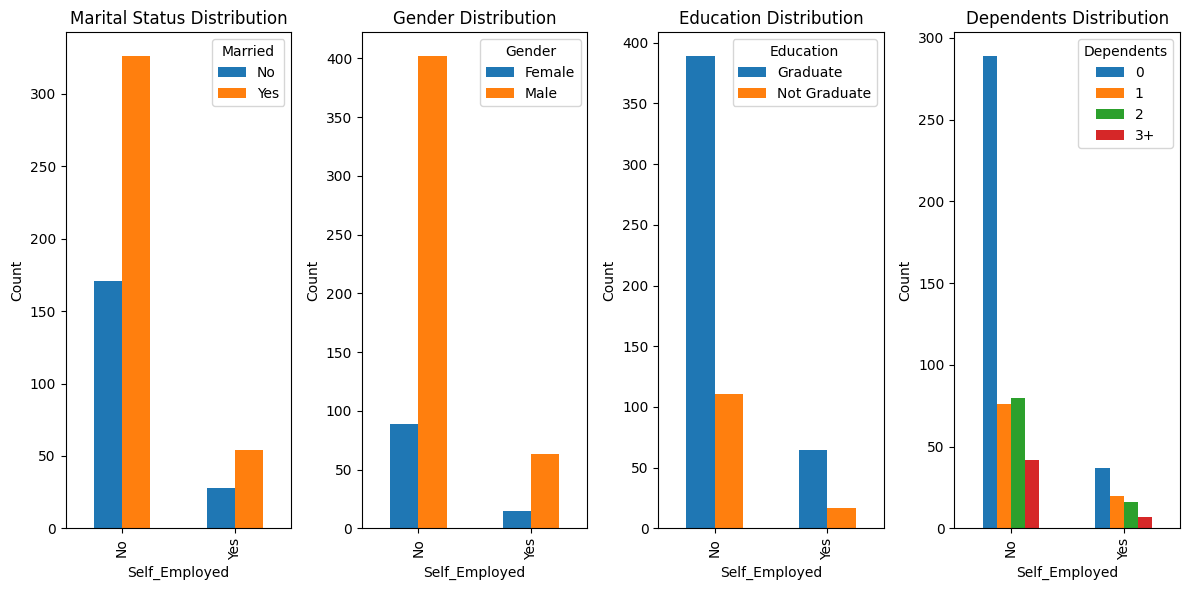

In [12]:
# Assuming you have loaded the dataset into a DataFrame called "loan_data"
grouped_G_M = loan_data.groupby(['Self_Employed', 'Married']).size().unstack()
grouped_G_D = loan_data.groupby(['Self_Employed', 'Gender']).size().unstack()
grouped_G_E = loan_data.groupby(['Self_Employed', 'Education']).size().unstack()
grouped_G_S = loan_data.groupby(['Self_Employed', 'Dependents']).size().unstack()

# Create a figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))

# Plot the first bar plot on the first subplot
grouped_G_M.plot(kind='bar', stacked=False, ax=axes[0])
axes[0].set_title('Marital Status Distribution')
axes[0].set_xlabel('Self_Employed')
axes[0].set_ylabel('Count')

# Plot the second bar plot on the second subplot
grouped_G_D.plot(kind='bar', stacked=False, ax=axes[1])
axes[1].set_title('Gender Distribution')
axes[1].set_xlabel('Self_Employed')
axes[1].set_ylabel('Count')

# Plot the third bar plot on the third subplot
grouped_G_E.plot(kind='bar', stacked=False, ax=axes[2])
axes[2].set_title('Education Distribution')
axes[2].set_xlabel('Self_Employed')
axes[2].set_ylabel('Count')

# Plot the fourth bar plot on the fourth subplot
grouped_G_S.plot(kind='bar', stacked=False, ax=axes[3])
axes[3].set_title('Dependents Distribution')
axes[3].set_xlabel('Self_Employed')
axes[3].set_ylabel('Count')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### for the applicant income column

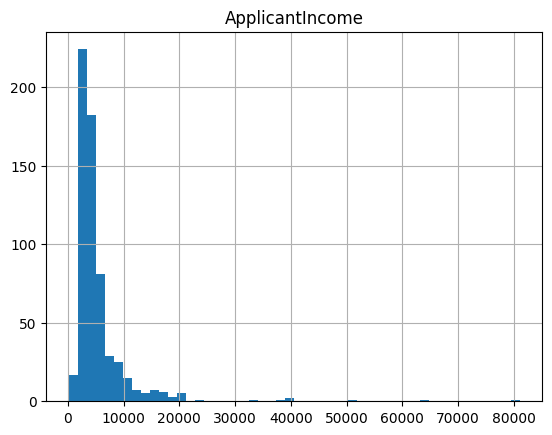

In [13]:
loan_data.hist(column='ApplicantIncome', bins=50);

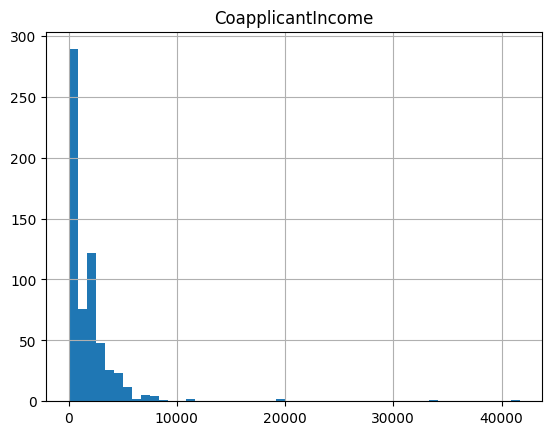

In [14]:
loan_data.hist(column='CoapplicantIncome', bins=50);

#### for the LoanAmount column

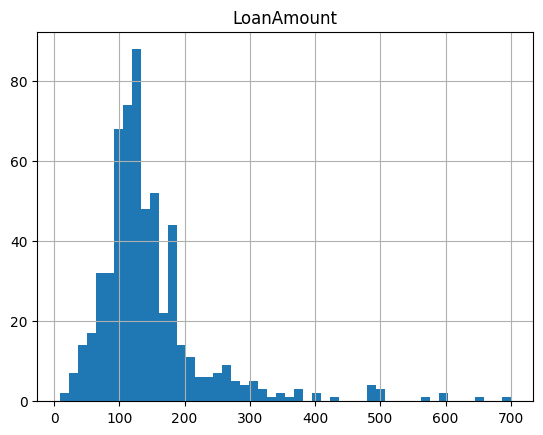

In [15]:
loan_data.hist(column='LoanAmount', bins=50);

#### for Loan_Amount_terms column

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

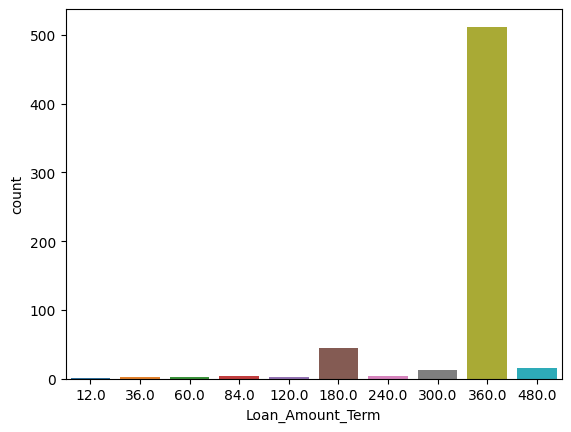

In [16]:
sns.countplot(x = 'Loan_Amount_Term', data = loan_data)

#### for the Loan Status column


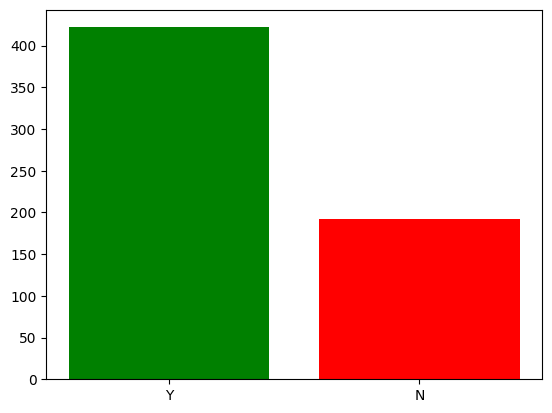

In [17]:
plt.bar(loan_data['Loan_Status'].unique(), loan_data['Loan_Status'].value_counts(), color=['green', 'red']);

## Preprocessing

Input data needs to be pre-processed before we feed it to model. Following things need to be taken care:

-Encoding Categorical Features.

-Imputing missing values

In [18]:
#Remove outliers 
import numpy as np
df = loan_data.copy()
df.shape

(614, 13)

In [19]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- Most of data are males so we assume the null gender are males
- We found similar data like missing married and they are married. So we are going to fill the null value with Yes.
- The applicants who didn't married will not be having dependents. So for the applicants those who are not married we can fill Dependents as 0 and for married dependents as 1
- The applicants who are not self employed will not be having any income from business. So we can fill the null values with 0
- we found that there are 22 null values present in loan amount. So we can fill the null values with the mean of the column.
- we found that there are 14 null values present in loan amount term. So we can fill the null values with the mean of the column.
- we found that there are 50 null values present in Credit history. Most of the applicants which is nearly 84 % of applicants given their Credit_History as 1. So we can fill the null values with 1


In [20]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Married'].map({'Yes': '1', 'No': '0'}), inplace=True)
df['ApplicantIncome'].fillna(df['ApplicantIncome'].mean(), inplace=True)
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean(), inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(value = 360.0, inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [22]:
# Encoding the categorical data
df.drop(['Loan_ID'], axis=1, inplace=True)
df['Gender'] = df['Gender'].apply(lambda x: {'Male':1,'Female':0}[x] )
df['Married'] = df['Married'].apply(lambda x: {'Yes':1,'No':0}[x] )
df['Education'] = df['Education'].apply(lambda x: {'Graduate':1,'Not Graduate':0}[x] )
df['Self_Employed'] = df['Self_Employed'].apply(lambda x: {'Yes':1,'No':0}[x] )
df['Loan_Status'] = df['Loan_Status'].apply(lambda x: {'Y':1,'N':0}[x] )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 57.7+ KB


In [23]:
#convert the object columns to numeric
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [24]:
dummy_columns = pd.get_dummies(df['Property_Area'], prefix='Property')
df = pd.concat([df, dummy_columns], axis=1)
df.drop(['Property_Area'], axis=1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Rural,Property_Semiurban,Property_Urban
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,False,False,True
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,True,False,False
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,False,False,True
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,False,False,True
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,False,False,True


In [25]:
dummy_columns = pd.get_dummies(df['Dependents'], prefix='Dependents')
df = pd.concat([df, dummy_columns], axis=1)
df.drop(['Dependents'], axis=1, inplace=True)
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Rural,Property_Semiurban,Property_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,1,0,1,0,5849,0.0,146.412162,360.0,1.0,1,False,False,True,True,False,False,False
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,True,False,False,False,True,False,False
2,1,1,1,1,3000,0.0,66.000000,360.0,1.0,1,False,False,True,True,False,False,False
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,1,False,False,True,True,False,False,False
4,1,0,1,0,6000,0.0,141.000000,360.0,1.0,1,False,False,True,True,False,False,False


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              614 non-null    int64  
 1   Married             614 non-null    int64  
 2   Education           614 non-null    int64  
 3   Self_Employed       614 non-null    int64  
 4   ApplicantIncome     614 non-null    int64  
 5   CoapplicantIncome   614 non-null    float64
 6   LoanAmount          614 non-null    float64
 7   Loan_Amount_Term    614 non-null    float64
 8   Credit_History      614 non-null    float64
 9   Loan_Status         614 non-null    int64  
 10  Property_Rural      614 non-null    bool   
 11  Property_Semiurban  614 non-null    bool   
 12  Property_Urban      614 non-null    bool   
 13  Dependents_0        614 non-null    bool   
 14  Dependents_1        614 non-null    bool   
 15  Dependents_2        614 non-null    bool   
 16  Dependen

In [27]:
# Feature Scaling
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(df[['ApplicantIncome']])
df['ApplicantIncome'] = scaler.transform(df[['ApplicantIncome']])
scaler.fit(df[['CoapplicantIncome']])
df['CoapplicantIncome'] = scaler.transform(df[['CoapplicantIncome']])
scaler.fit(df[['LoanAmount']])
df['LoanAmount'] = scaler.transform(df[['LoanAmount']])
scaler.fit(df[['Loan_Amount_Term']])
df['Loan_Amount_Term'] = scaler.transform(df[['Loan_Amount_Term']])
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Rural,Property_Semiurban,Property_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,1,0,1,0,0.072991,-0.554487,0.000000,0.273231,1.0,1,False,False,True,True,False,False,False
1,1,1,1,0,-0.134412,-0.038732,-0.219273,0.273231,1.0,0,True,False,False,False,True,False,False
2,1,1,1,1,-0.393747,-0.554487,-0.957641,0.273231,1.0,1,False,False,True,True,False,False,False
3,1,1,0,0,-0.462062,0.251980,-0.314547,0.273231,1.0,1,False,False,True,True,False,False,False
4,1,0,1,0,0.097728,-0.554487,-0.064454,0.273231,1.0,1,False,False,True,True,False,False,False


<Axes: >

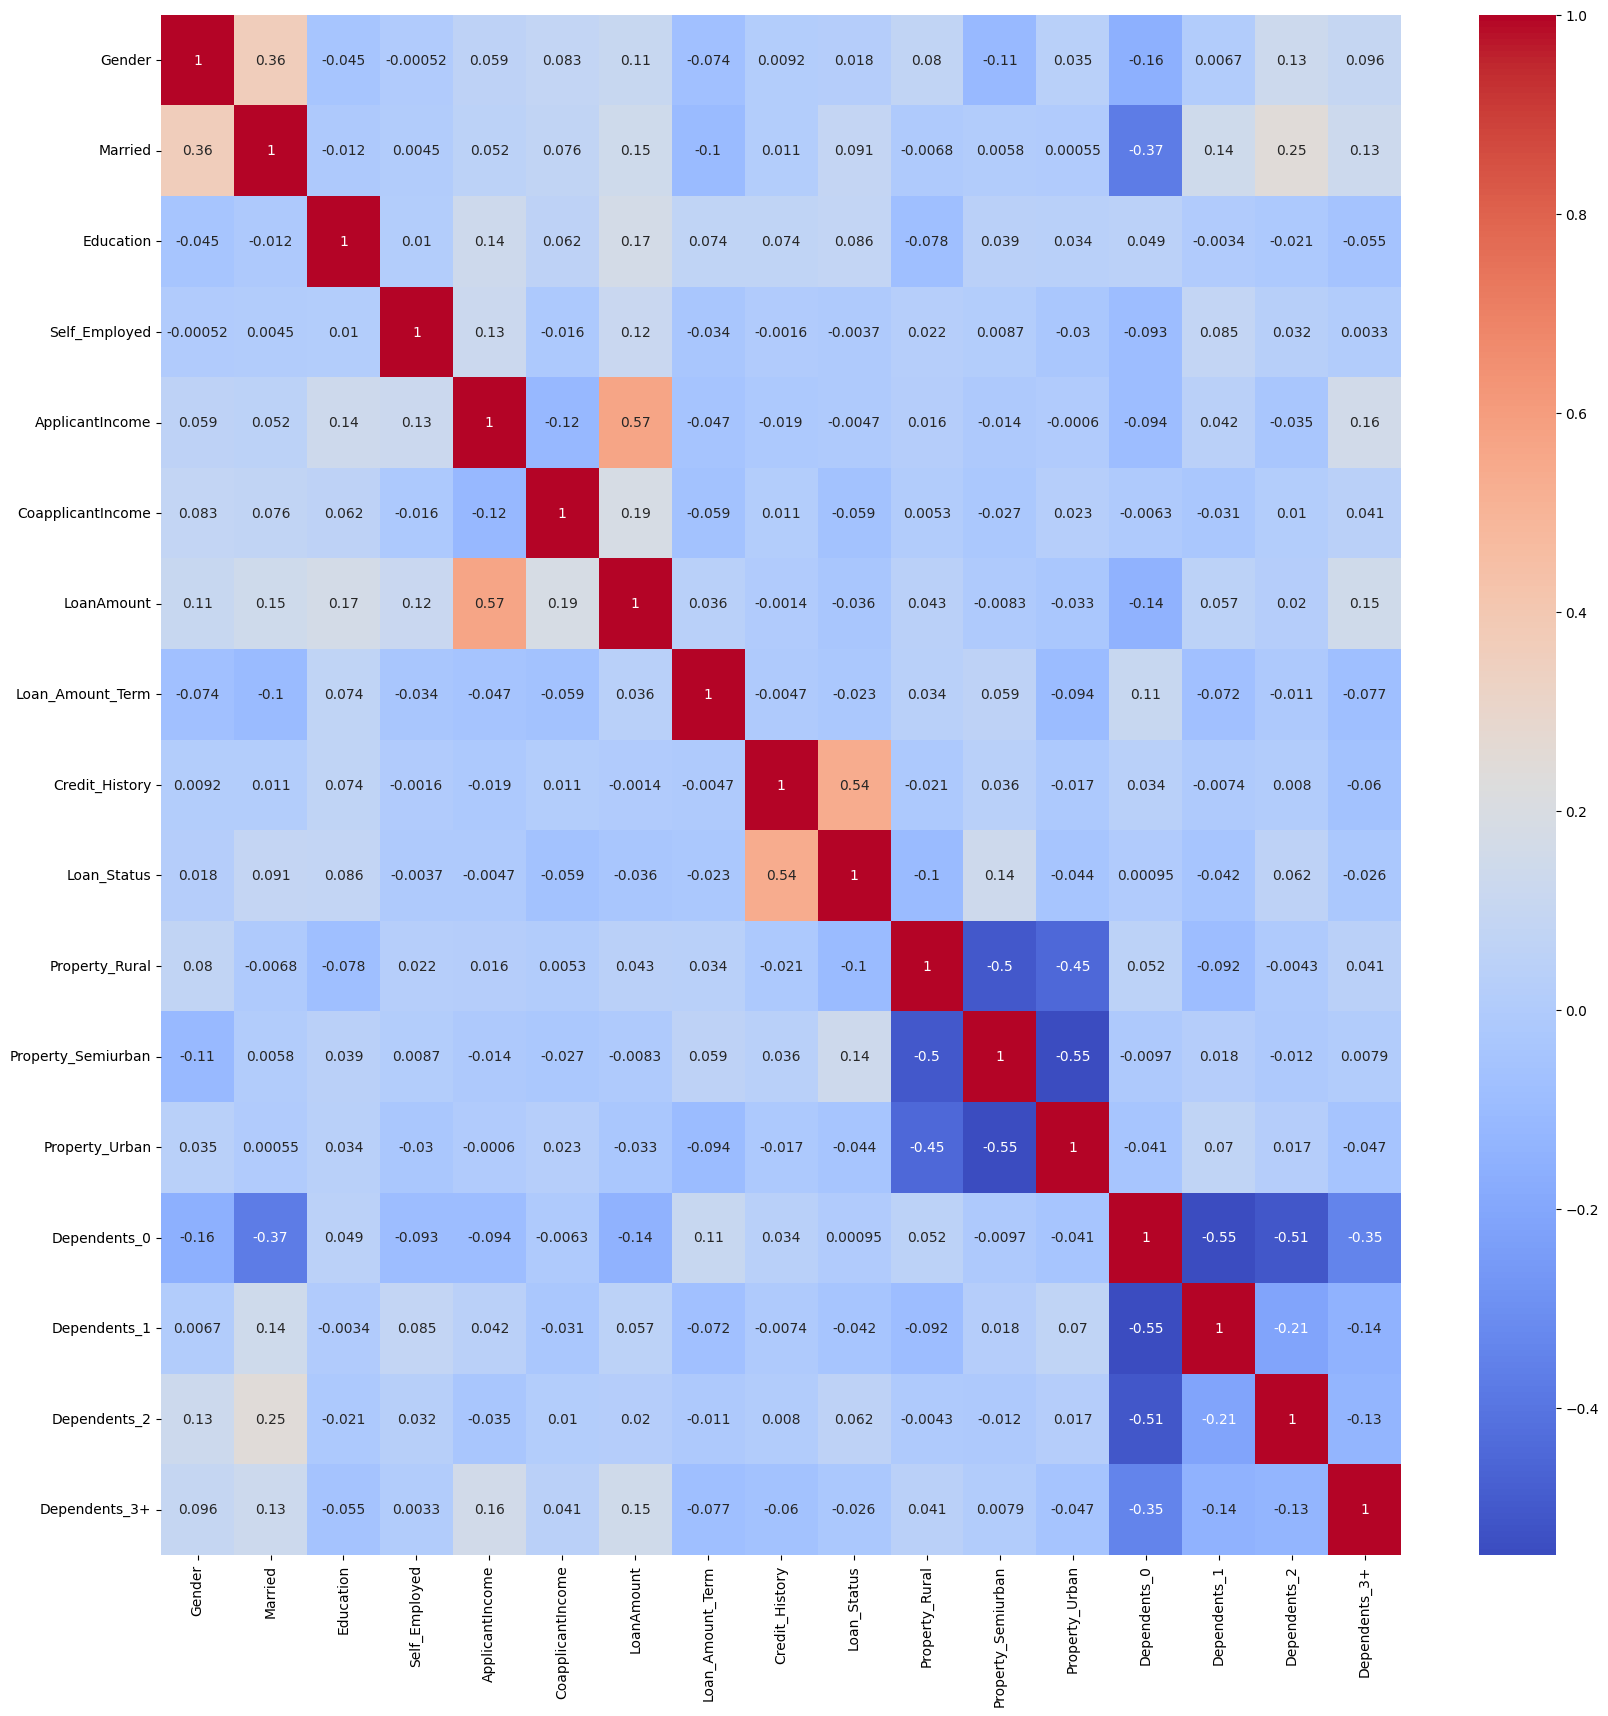

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(df.select_dtypes(include=['bool','int64','float64']).corr(), annot=True, cmap='coolwarm')

### Split the data into train and test

In [29]:
from sklearn.model_selection import train_test_split
X = df.drop(['Loan_Status'], axis=1)
y= df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Model Building

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy score for KNN is:', accuracy_score(y_test, y_pred))

Accuracy score for KNN is: 0.7723577235772358


In [31]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print('Accuracy score for Logistic Regression is:', accuracy_score(y_test, y_pred))

Accuracy score for Logistic Regression is: 0.8373983739837398


In [32]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Accuracy score for Decision Tree is:', accuracy_score(y_test, y_pred))

Accuracy score for Decision Tree is: 0.6910569105691057


In [33]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy score for Random Forest is:', accuracy_score(y_test, y_pred))

Accuracy score for Random Forest is: 0.7723577235772358


In [34]:
result = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest'],
    "Score": [accuracy_score(y_test, knn.predict(X_test)), accuracy_score(y_test, log_reg.predict(X_test)), accuracy_score(y_test, dt.predict(X_test)), accuracy_score(y_test, rf.predict(X_test))]
})
result = result.sort_values(by='Score', ascending=False)
result = result.set_index('Score')
result.head()

,Model
Score,
0.837398,Logistic Regression
0.772358,KNN
0.772358,Random Forest
0.691057,Decision Tree
